# Dense MLPs & CNNs using PyTorch

In [ ]:
! pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 103kB/s 
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


Mount your google drive in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Append the directory to your python path using sys.

Please do modify the `customized_path_to_your_homework` to where you uploaded your homework in the Google Drive

In [ ]:
import sys
import os
prefix = '/content/gdrive/'
customized_path_to_your_homework = 'My Drive/CNN_helper'
sys_path = os.path.join(prefix, customized_path_to_your_homework)
sys.path.append(sys_path)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class TwoLayerNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(f'iteration {t}: {loss.item()}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

iteration 99: 2.746034860610962
iteration 199: 0.0502784289419651
iteration 299: 0.0014080111868679523
iteration 399: 4.809701567864977e-05
iteration 499: 1.9016213173017604e-06


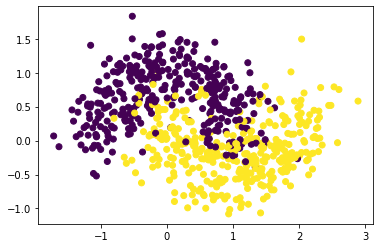

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 

current_path = prefix + customized_path_to_your_homework
X_train = np.loadtxt(current_path + '/data/X1_train.csv', delimiter=',')
X_test = np.loadtxt(current_path + '/data/X1_test.csv', delimiter=',')
y_train = np.loadtxt(current_path + '/data/y1_train.csv', delimiter=',')
y_test = np.loadtxt(current_path + '/data/y1_test.csv', delimiter=',')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
batch_size = 64 # mini-batch size
num_workers = 2 # how many parallel workers are we gonna use for reading data
shuffle = True # shuffle the dataset

# Convert numpy array import torch tensor
X_val = torch.FloatTensor(X_train[500:])
X_train = torch.FloatTensor(X_train[:500])
X_test = torch.FloatTensor(X_test)
y_val = torch.LongTensor(y_train.reshape(-1, 1)[500:])
y_train = torch.LongTensor(y_train.reshape(-1, 1)[:500])
y_test = torch.LongTensor(y_test.reshape(-1, 1))

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, 
                          num_workers=num_workers, shuffle=shuffle)

In [ ]:
class SimpleNN(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, H)
        self.linear3 = nn.Linear(H, D_out)

        self.sigmoid = nn.Sigmoid()
        self.ReLU = nn.ReLU()
        pass

    def forward(self, x):

        h_1 =  self.linear1(x) 
        h_2 = self.ReLU(h_1)
        h_3 = self.linear2(h_2)
        h_4 = self.ReLU(h_3)
        h_5 = self.linear3(h_4)
        y_pred = self.sigmoid(h_5)
        return y_pred
        pass


In [ ]:
# helper function for computing accuracy
def get_acc(pred, y):
    pred = pred.float()
    y = y.float()
    return (y==pred).sum().float()/y.size(0)*100.

In [ ]:
def Solver(model, train_loader, optim, criterion, epoch=501, lr=1e-1, print_every=20):
  '''
  model: your designed model
  train_loader: data loader for training data
  optim: SGD optimizer
  criterion: criterion for calculating loss, i.e. nn.BCELoss
  epoch: number of training epochs, an epoch means looping through all the data in the datasets
  lr: training learning rate
  print_every: number of epochs to print out loss and accuracies
  '''
  for e in range(epoch):
      loss_epoch = 0
      for x, y in train_loader:
        optim.zero_grad()
        y_pred = model(x)
        loss =  criterion(y_pred.double(), y.double() )
        loss.backward()
        optim.step()     
        loss_epoch += loss.item() 
      if e % print_every == 0:
          y_pred = (model(X_train) > 0.5)
          train_acc = get_acc(y_pred, y_train)
          y_val_pred = (model(X_val) > 0.5)
          val_acc = get_acc(y_val_pred, y_val)  
          print(f'Epcoh {e}: {loss_epoch}, Training accuracy: {train_acc}, Validation accuracy: {val_acc}')
  return model

In [ ]:
epoch=60
lr=0.001

D_in = np.shape(X_test)[1]
H = 200
D_out = np.shape(y_test)[1]
criterion = nn.BCELoss()

model = SimpleNN(D_in, H, D_out)
optim = torch.optim.SGD(model.parameters(), lr=lr)


# train model
model = Solver(model, train_loader, optim, criterion, epoch=epoch, lr=lr, print_every=20)

Epcoh 0: 5.671718732844082, Training accuracy: 46.599998474121094, Validation accuracy: 46.0
Epcoh 20: 5.280022548234266, Training accuracy: 78.4000015258789, Validation accuracy: 77.5
Epcoh 40: 4.964811611480893, Training accuracy: 85.0, Validation accuracy: 84.5


Evaluate your accuracy:

In [ ]:
y_pred = (model(X_train) > 0.5)
train_acc = get_acc(y_pred, y_train)

y_val_pred = (model(X_val) > 0.5)
val_acc = get_acc(y_val_pred, y_val)  

y_pred = (model(X_test) > 0.5)
test_acc = get_acc(y_pred, y_test)
print(f'Training accuracy: {train_acc}, Validation accuracy: {val_acc}, Testing accuracy: {test_acc}')

Training accuracy: 83.4000015258789, Validation accuracy: 82.0, Testing accuracy: 84.0


# CIFAR10 with MLP

In [ ]:
import torchvision
import torchvision.transforms as transforms

#transformations on the dataset to learn possible augmentations 

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

current_path = prefix + customized_path_to_your_homework
trainset = torchvision.datasets.CIFAR10(root=current_path + '/data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root=current_path + '/data', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class SimpleNN(nn.Module):
    
    def __init__(self, D_in, D_out):
        super().__init__()

        H = 500
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, H)
        self.linear3 = nn.Linear(H, D_out)

        self.sigmoid = nn.Sigmoid()
        self.ReLU = nn.ReLU()
        

        
    def forward(self, x):

        batch_size = x.size(0)
        x = x.view(batch_size, -1) # reshape the data from (B, C, H, W) to (B, C*H*W)
        h_1 =  self.linear1(x) 
        h_2 = self.ReLU(h_1)
        h_3 = self.linear2(h_2)
        h_4 = self.ReLU(h_3)
        h_5 = self.linear3(h_4)
        y_pred =  self.ReLU(h_5)
        return y_pred


In [ ]:
epoch = 15
lr = 1e-2
n_input = 3072
n_classes = 10
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

D_in = n_input
H = 500
D_out = 10
criterion = nn.CrossEntropyLoss()

model = SimpleNN(D_in, D_out)
optim = torch.optim.SGD(model.parameters(), lr=lr)


# train model
for e in range(epoch):
      for x, y in train_loader:
        optim.zero_grad()
        batch_size = x.size(0)

        x = x.view(batch_size, -1) # reshape the data from (B, C, H, W) to (B, C*H*W)
        y_pred = model(x)
        loss =  criterion(y_pred , y)
        loss.backward()
        optim.step()     
      print(e)



In [ ]:
def get_model_acc(model, loader):
    ys = []
    y_preds = []
    for x, y in loader:
        cuda = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.cuda()
        x = x.cuda()    
        y=y.cuda()
        ys.append(y)
        # set the prediction to the one that has highest value
        # Note that the the output size of model(x) is (B, 10)
        y_preds.append(torch.argmax(model(x), dim=1))
    y = torch.cat(ys, dim=0)
    y_pred = torch.cat(y_preds, dim=0)
    print((y == y_pred).sum())
    return get_acc(y_pred, y)

In [ ]:
train_acc = get_model_acc(model, train_loader)
test_acc = get_model_acc(model, test_loader)
print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')

tensor(33160, device='cuda:0')
tensor(4938, device='cuda:0')
Training accuracy: 66.31999969482422, Testing accuracy: 49.37999725341797


## CNN



In [ ]:
import torch.nn.functional as F
class CNNClassifier(nn.Module):
    
    def __init__(self, D_in, D_out, Conv_layers=1, out_channels=[], conv_kernel=5):
        super(CNNClassifier, self).__init__()
           
        self.Conv_layers = Conv_layers
        self.out_channels = out_channels
        self.conv_kernel = conv_kernel
        self.conv_set =[]
        self.conv_set.append(nn.Conv2d(3, out_channels[0], 5))    
        for c in range(Conv_layers-1):
          self.conv_set.append(nn.Conv2d(out_channels[c], out_channels[c+1], conv_kernel))                                              #


        #self.conv1_for_loop =  self.conv_set[0]
        #self.conv2_for_loop =  self.conv_set[1]

        self.conv1 = nn.Conv2d(3, out_channels[0], 5)
        self.conv2 = nn.Conv2d(out_channels[0], out_channels[1], conv_kernel)
        self.fcc1 = nn.Linear(out_channels[1]*5*5, 10)

        self.sigmoid = nn.Sigmoid()
        self.ReLU = nn.ReLU()
        self.MaxPool2d = nn.MaxPool2d(2, stride=2)
        
        
    def forward(self, x):      
       '''           
        next = self.conv_set[0](x)    # first layer always input
        next = self.ReLU(next)
        next =  self.MaxPool2d(next)

        for c in range(self.Conv_layers - 1):   # next conv layers after the first, only dependent on past input, transfer functions and pooling
          next = self.conv_set[c+1](next)
          next = self.ReLU(next)
          next =  self.MaxPool2d(next)
        
        next = next.reshape(-1, self.out_channels[len(self.out_channels)-1]*5*5) #reshape before entering final fcc
        #print(np.shape(next))
        # fcc
        next = self.fcc1(next)
        y_pred_for_loop =  self.sigmoid(next)
        '''
        

        hc_1 = self.conv1(x)
        hr_1 = self.ReLU(hc_1)
        hm_1 =  self.MaxPool2d(hr_1)

        hc_2 = self.conv2(hm_1)
        hr_2 = self.ReLU(hc_2)
        hm_2 = self.MaxPool2d(hr_2)

        hm_2 = hm_2.reshape(-1, 16*5*5)
        #print(np.shape(hm_2))
        hlin_1 = self.fcc1(hm_2)
        y_pred =  self.ReLU(hlin_1) 
        return y_pred 


In [ ]:
epoch = 15
lr = 0.1
n_input = 3072
n_classes = 10
batch_size = 64
num_workers = num_workers

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

D_in = n_input
D_out = n_classes
criterion = nn.CrossEntropyLoss()

model = CNNClassifier(D_in, D_out, Conv_layers=2, out_channels=[8,16])
print(model)

optim = torch.optim.SGD(model.parameters(), lr=lr)


# train model
for e in range(epoch):
      print(e)

      for x, y in train_loader:
        optim.zero_grad()
        batch_size = x.size(0)
        cuda = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.cuda()
        x = x.cuda()
        #print(x.size())
        #x = x.view(batch_size, -1) # reshape the data from (B, C, H, W) to (B, C*H*W)
        y_pred = model(x)
        y = y.cuda()
        loss =  criterion(y_pred , y)
        #print(loss)
        #loss.requres_grad = True
        loss.backward()
        optim.step()   

CNNClassifier(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fcc1): Linear(in_features=400, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (ReLU): ReLU()
  (MaxPool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:

model.eval()
train_acc = get_model_acc(model, train_loader)
test_acc = get_model_acc(model, test_loader)
print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')

tensor(28156, device='cuda:0')
tensor(5376, device='cuda:0')
Training accuracy: 56.3120002746582, Testing accuracy: 53.7599983215332


If we visualize the output block of each conv layer, we see that after convolution and maxpooling the length x bredth is decreasing and the depth (channels) is increasing.

The chosen design has 2 Conv2d layers with channel configuration as (3 (input rgb channels) , 8) and (8, 16) respectively. The Linear layer is Fully connected and has config (16x5x5, 10). Ther kernel size for Conv2d layers is 5x5 for both. I have 2 maxpooling layers (size: 2 and stride: 2), each one after the ReLU transformation on Conv2d layers to reduce the number of parameters. 

The learning rate is set to 0.1 and # of epochs is 15. The input dimension for FCC layer is calculated with the final channel size, kernel size, stride of conv layers and maxpooling layers. By default the stride is set to 1, the input (single) image is 3x32x32 and convolution with 5x5 kernel gives 8x28x28 output which is passed through ReLU (doesn't affect dims) and then maxpooled with 2x2 kernel and stride = 2, hence the output is further reduced to 8x14x14. Repeating this again with the next conv layer we have 16x10x10 output and then maxpooling -> 16x5x5 output. 

In [ ]:

from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from time import time
class Multi_Net(nn.Module):   
    def __init__(self, Conv_layers=1, out_channels=[]):
        super(Multi_Net, self).__init__()


        self.Conv_layers = Conv_layers
        self.out_channels = out_channels


        if self.Conv_layers == 1:

          self.cnn_layers = Sequential(
            Conv2d(3, 6, kernel_size=5),
            BatchNorm2d(6),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=4, stride=4))
          
          if self.Conv_layers == 1:
            self.linear_layers = Sequential(
              Linear(6 * 7 * 7, 10)) 


        if self.Conv_layers == 2:

          self.cnn_layers = Sequential(
            Conv2d(3, 6, kernel_size=3),
            BatchNorm2d(6),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(6, 8, kernel_size=4),
            BatchNorm2d(8),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2))  
          if self.Conv_layers == 2:
            self.linear_layers = Sequential(
              Linear(8 * 6 * 6, 10))    
        
        if self.Conv_layers == 3:

          self.cnn_layers = Sequential(
            Conv2d(3, 6, kernel_size=3),
            BatchNorm2d(6),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(6, 8, kernel_size=4),
            BatchNorm2d(8),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=1),
            Conv2d(8, 10, kernel_size=4),
            BatchNorm2d(10),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=1)) 
          if self.Conv_layers == 3:
            self.linear_layers = Sequential(
              Linear(10 * 7 * 7, 10)) 
          

        if self.Conv_layers == 4:

          self.cnn_layers = Sequential(
            Conv2d(3, 6, kernel_size=3),
            BatchNorm2d(6),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(6, 8, kernel_size=4),
            BatchNorm2d(8),
            ReLU(inplace=True),
            
            Conv2d(8, 10, kernel_size=3),
            BatchNorm2d(10),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=1),
            Conv2d(10, 12, kernel_size=3),
            BatchNorm2d(12),
            ReLU(inplace=True)) 
          self.linear_layers = Sequential(
            Linear(12 * 7 * 7, 10))
        

    # Defining the forward pass    
    def forward(self, x):
        cuda = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        x = x.cuda()
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x


criterion = nn.CrossEntropyLoss()
def trainer(train_loader, criterion, model, epoch, optim):
  # train model
  
  for e in range(epoch):
      for x, y in train_loader:
        if optim == 'SGD':
          optim = torch.optim.SGD(model.parameters(), lr=0.01)  
        if optim == 'ADAM':
          optim = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

        if optim == 'RMSProp':
          optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

        cuda = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.cuda()
        x = x.cuda()
        y = y.cuda()
        optim.zero_grad()
        y_pred = model(x)
        loss =  criterion(y_pred , y)
        loss.backward()
        optim.step() 
      print(e) 
 
Layers = [1,2,3,4]
Test_accuracies = []
Time = []
Total_Params = []
Model_dict = {"Layers": Layers,
              "Test_accuracies": Test_accuracies,
              "Time": Time,
              "Total_Params": Total_Params}
print(Model_dict)
for layer in Layers:
  toc = time()
  model = Multi_Net(Conv_layers=layer)
  trainer(train_loader, criterion, model, 10, 'SGD')
  print(model)
  model.eval()
  train_acc = get_model_acc(model, train_loader)
  test_acc = get_model_acc(model, test_loader)
  tic = time()
  Model_dict["Time"].append(tic-toc)
  Model_dict["Test_accuracies"].append(test_acc)
  Model_dict["Total_Params"].append(sum(p.numel() for p in model.parameters()))
  print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')
  
  print(Model_dict)

{'Layers': [1, 2, 3, 4], 'Test_accuracies': [], 'Time': [], 'Total_Params': []}
0
1
2
3
4
5
6
7
8
9
Multi_Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=294, out_features=10, bias=True)
  )
)
tensor(26894, device='cuda:0')
tensor(5325, device='cuda:0')
Training accuracy: 53.788002014160156, Testing accuracy: 53.249996185302734
{'Layers': [1, 2, 3, 4], 'Test_accuracies': [tensor(53.2500, device='cuda:0')], 'Time': [106.35308527946472], 'Total_Params': [3418]}
0
1
2
3
4
5
6
7
8
9
Multi_Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)

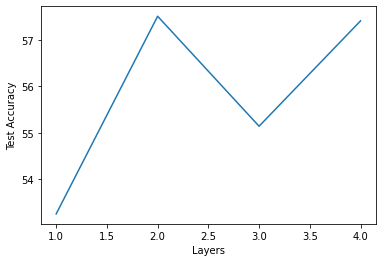

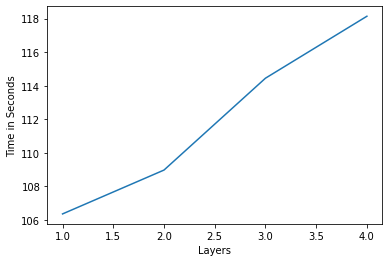

In [ ]:

Model_dict["Layers"] = [1,2,3,4]
plot1 = plt.figure(1)
plt.plot(Model_dict["Layers"], Model_dict["Test_accuracies"])
plt.xlabel("Layers")
plt.ylabel("Test Accuracy")

plot2 = plt.figure(2)
plt.plot(Model_dict["Layers"],  Model_dict["Time"])
plt.xlabel("Layers")
plt.ylabel("Time in Seconds")

plt.show()

In [ ]:
print(Model_dict)

{'Layers': [1, 2, 3, 4], 'Test_accuracies': [tensor(53.2500, device='cuda:0'), tensor(57.5100, device='cuda:0'), tensor(55.1400, device='cuda:0'), tensor(57.4100, device='cuda:0')], 'Time': [106.35308527946472, 108.96790385246277, 114.4445788860321, 118.13892436027527], 'Total_Params': [3418, 3862, 7192, 8728]}




My observations are as follows:

Computation time increased with the number of layers, this is because of increased number of parameters to train and computation for backpropagation to update the same.

Number of convolution layers doesn't directly correspond to increased accuracy, a lot is dependent on how the inner configuration is set (i.e., kernel size, choice of transfer function, number of maxpooling layers, etc).

Sometimes, maxpooling may impose a decline in accuracy when it is applied too often, information is lost in doing so as it takes only the highest off the kernel size. Additionally, batchnorm should be incorporated and dropouts as well, because the chances of overfitting also rises with that of parameters.

In [ ]:
# OPTIMIZER experiments


Layers = [1,2,3,4]
Test_accuracies = []
Time = []
Total_Params = []
Model_dict = {"Layers": Layers,
              "Test_accuracies": Test_accuracies,
              "Time": Time,
              "Total_Params": Total_Params}
print(Model_dict)
optim_set = [ 'RMSProp', 'ADAM']
for optim in optim_set:
  print("the optimizer is", optim)
  for layer in Layers:
    toc = time()
    model = Multi_Net(Conv_layers=layer, out_channels=[8,16])
    trainer(train_loader, criterion, model, 10, optim)
    print(model)
    model.eval()
    train_acc = get_model_acc(model, train_loader)
    test_acc = get_model_acc(model, test_loader)
    tic = time()
    Model_dict["Time"].append(tic-toc)
    Model_dict["Test_accuracies"].append(test_acc)
    Model_dict["Total_Params"].append(sum(p.numel() for p in model.parameters()))
    print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')
  
    print(Model_dict)



{'Layers': [1, 2, 3, 4], 'Test_accuracies': [], 'Time': [], 'Total_Params': []}
the optimizer is RMSProp
0
1
2
3
4
5
6
7
8
9
Multi_Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=294, out_features=10, bias=True)
  )
)
tensor(26211, device='cuda:0')
tensor(5101, device='cuda:0')
Training accuracy: 52.4219970703125, Testing accuracy: 51.01000213623047
{'Layers': [1, 2, 3, 4], 'Test_accuracies': [tensor(51.0100, device='cuda:0')], 'Time': [105.57419276237488], 'Total_Params': [3418]}
0
1
2
3
4
5
6
7
8
9
Multi_Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (

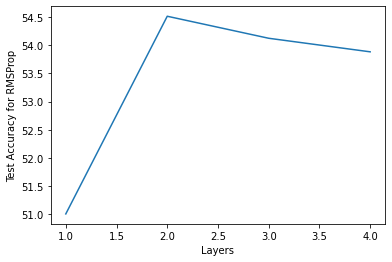

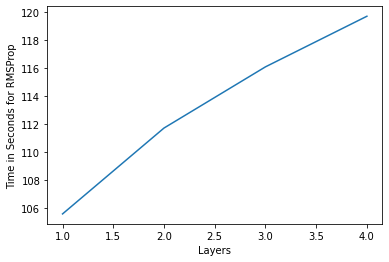

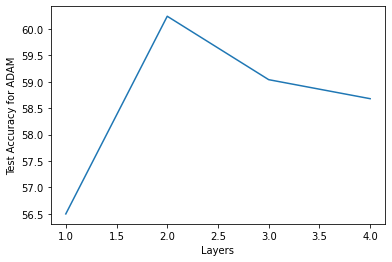

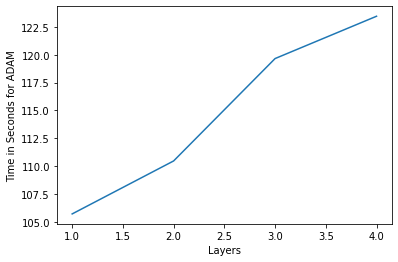

In [ ]:
Model_dict["Layers"] = [1,2,3,4]
plot1 = plt.figure(1)
plt.plot(Model_dict["Layers"], Model_dict["Test_accuracies"][:4])
plt.xlabel("Layers")
plt.ylabel("Test Accuracy for RMSProp")

plot2 = plt.figure(2)
plt.plot(Model_dict["Layers"],  Model_dict["Time"][:4])
plt.xlabel("Layers")
plt.ylabel("Time in Seconds for RMSProp")

plot1 = plt.figure(3)
plt.plot(Model_dict["Layers"], Model_dict["Test_accuracies"][4:])
plt.xlabel("Layers")
plt.ylabel("Test Accuracy for ADAM")

plot2 = plt.figure(4)
plt.plot(Model_dict["Layers"],  Model_dict["Time"][4:])
plt.xlabel("Layers")
plt.ylabel("Time in Seconds for ADAM")

plt.show()


Adam Optimizer is better than RMSProp and SGD. Here, for constant epochs=10 for all optimizers, ADAM gave the highest accuracy > 60%. Additionally, ADAM took slightly more time that RMSProp and SGD, but this is because we had the same epochs for all. Had we set a convergence criterion, ADAM would have converged first.

In [ ]:
# Further Improvements
 
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, SELU
from time import time
class Accurate_Net(nn.Module):   
    def __init__(self, Conv_layers=1, out_channels=[]):
        super(Accurate_Net, self).__init__()

        self.cnn_layers = Sequential(
          Conv2d(3, 6, kernel_size=5),
          BatchNorm2d(6),
          ReLU(inplace=False),
          nn.Dropout(0.2),
          #MaxPool2d(kernel_size=2, stride=2),

          Conv2d(6, 12, kernel_size=5),
          BatchNorm2d(12),
          ReLU(inplace=False),
          MaxPool2d(kernel_size=2, stride=2),
          nn.Dropout(0.2),

          Conv2d(12, 24, kernel_size=4),
          BatchNorm2d(24),
          ReLU(inplace=False),
          #MaxPool2d(kernel_size=2, stride=2),
          nn.Dropout(0.2),

          Conv2d(24, 48, kernel_size=3),
          BatchNorm2d(48),
          ReLU(inplace=False),
          nn.Dropout(0.2),
          
          Conv2d(48, 96, kernel_size=3),
          BatchNorm2d(96),
          ReLU(inplace=False),
          nn.Dropout(0.2),) 
        self.linear_layers = Sequential(
          Linear(96 * 5 * 5, 200),
          ReLU(inplace=False),
          Linear(200, 10),
          )
        

    # Defining the forward pass    
    def forward(self, x):
        cuda = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
         
        x = x.cuda()
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x


criterion = nn.CrossEntropyLoss()

def trainer(train_loader, criterion, model, epoch, optim):
  # train your model
  
  for e in range(epoch):
      for x, y in train_loader:
        if optim == 'SGD':
          optim = torch.optim.SGD(model.parameters(), lr=0.01)  
        if optim == 'ADAM':
          optim = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

        if optim == 'RMSProp':
          optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

        cuda = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.cuda()
        x = x.cuda()
        y = y.cuda()
        optim.zero_grad()
        y_pred = model(x)
        loss =  criterion(y_pred , y)
        loss.backward()
        optim.step() 
      #print(e) 

model = Accurate_Net(Conv_layers=5)
trainer(train_loader, criterion, model, 15, 'ADAM')
print(model)
model.eval()
train_acc = get_model_acc(model, train_loader)
test_acc = get_model_acc(model, test_loader)
print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Accurate_Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout(p=0.2, inplace=False)
    (9): Conv2d(12, 24, kernel_size=(4, 4), stride=(1, 1))
    (10): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Dropout(p=0.2, inplace=False)
    (13): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
    (14): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU()
    (16): Dropout(p=0.2, inplace=False)
    (17): Conv2d(48, 96,